In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import random
from collections import Counter
from functools import reduce
from itertools import chain
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
import keras.utils as image

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")


##### Using, NearestNeighbours, we will find the closest point of that particular input #####
from sklearn.neighbors import NearestNeighbors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
##### Import all the datasets #####
try:
  book_df   = pd.read_csv('/content/Books.csv')
  rating_df = pd.read_csv('/content/Ratings.csv')
  users_df  = pd.read_csv('/content/Users.csv')
except Exception as e:
  print(e.with_traceback)
else:
  print('Datasets imported.'.capitalize())

Datasets imported.


In [3]:
##### Show the book dataset #####
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
##### Show the ratings dataset #####
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
##### Show the users df #####
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
##### Show the all features of all datasets #####
def show_features_name(book_df, rating_df, users_df):
  return book_df.columns, rating_df.columns, users_df.columns

if __name__ == "__main__":
  try:
    book_columns, rating_columns, users_columns = show_features_name(book_df, rating_df, users_df)
  except Exception as e:
    print(e.with_traceback)
  else:
    print('The features list of book dataset is   {}'.format(book_columns),'\n')
    print('*'*120)
    print('The features list of rating dataset is {}'.format(rating_columns),'\n')
    print('*'*120)
    print('The features list of users dataset is  {}'.format(users_columns))

The features list of book dataset is   Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object') 

************************************************************************************************************************
The features list of rating dataset is Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object') 

************************************************************************************************************************
The features list of users dataset is  Index(['User-ID', 'Location', 'Age'], dtype='object')


In [7]:
"""
***User-ID is common in Ratings and Users Dataset.***
***ISBN is common in Books and Ratings Dataset.***
"""

'\n***User-ID is common in Ratings and Users Dataset.***\n***ISBN is common in Books and Ratings Dataset.***\n'

In [8]:
##### Show the shape of all the datsets #####
def show_shape(book_df, rating_df, users_df):
  return book_df.shape, rating_df.shape, users_df.shape

if __name__ == "__main__":
  try:
    book_shape, rating_shape, user_shape = show_shape(book_df, rating_df, users_df)
  except Exception as e:
    print(e.with_traceback)
  else:
    print('The shape of book is   {}'.format(book_shape),'\n')
    print('The shape of rating is {}'.format(rating_shape),'\n')
    print('The shape of user is   {}'.format(user_shape),'\n')

The shape of book is   (271360, 8) 

The shape of rating is (1149780, 3) 

The shape of user is   (278858, 3) 



In [9]:
print('The number of length of User-ID in ratings dataset is = {}'.format(len(rating_df.loc[:, 'User-ID'])),'\n')
print('The number of unique length of User-Id in rating datset is = {}'.format(rating_df.loc[:, 'User-ID'].nunique()),'\n')
print('The number of duplicated length of User-Id in rating datset is = {}'.format(rating_df.loc[:, 'User-ID'].duplicated().sum()))

# """
# **** Meaning That, in Ratings dataset - ONE user gives multiple ratings on IBSN books.****
# """

The number of length of User-ID in ratings dataset is = 1149780 

The number of unique length of User-Id in rating datset is = 105283 

The number of duplicated length of User-Id in rating datset is = 1044497


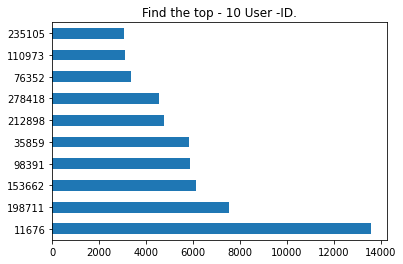

In [10]:
##### Find out top 10 User -ID who rates the books ####
plt.figure(figsize = (6, 4))
plt.title('Find the top - 10 User -ID.')
rating_df.loc[:, 'User-ID'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

In [11]:
##### Find out the top 5 books based on top 5 - users #####
def find_highest_rating(group):
  return group[group['Book-Rating'] == group['Book-Rating'].max()]

rating_df[rating_df.loc[:, 'User-ID'].isin(rating_df.groupby(['User-ID'])['User-ID'].\
                                           count().sort_values(ascending = False).head(10).index)].\
                                           groupby(['User-ID']).apply(find_highest_rating).\
                                           drop_duplicates(subset = ['User-ID'])

,,User-ID,ISBN,Book-Rating
User-ID,,,,
11676,45353,11676,000225929X,10
35859,157178,35859,0004722124,10
76352,316549,76352,0312117787,10
98391,405920,98391,0060002077,10
110973,462343,110973,0060502258,10
153662,631972,153662,0060224525,10
198711,822807,198711,0878300481,10
212898,877896,212898,0060992301,5
235105,974599,235105,0060083956,10


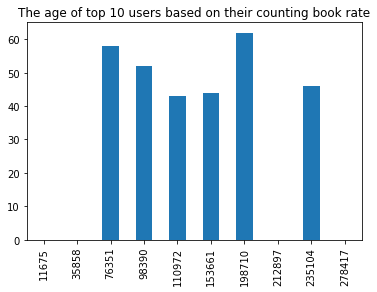

In [12]:
##### Find out the age of top - 10 best users #####
plt.title('The age of top 10 users based on their counting book rate')
users_df[users_df.loc[:, 'User-ID'].isin(rating_df.groupby(['User-ID']).\
                                count()['Book-Rating'].sort_values(ascending = False).\
                                head(10).index)]['Age'].plot(kind = 'bar')

plt.show()

Popularity Based Recommendation System

In [13]:
# """
# In this technique, we will consider those book which avgerage rating is higher AND those book will be taken which obtained more than 250 votes.
# """

df = book_df.merge(rating_df, on = 'ISBN')
new_df = df.loc[:, ['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
new_df.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0


In [14]:
##### Find the average rating #####
avg_rating = new_df.groupby(['Book-Title']).mean()['Book-Rating'].\
                              reset_index().rename(columns = \
                              {'Book-Rating': 'avg_rating'})
avg_rating.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [15]:
##### Find the count rating #####
count_rating = new_df.groupby(['Book-Title']).count()['Book-Rating'].reset_index().rename(columns = {'Book-Rating': 'count_rating'})

count_rating.head()

,Book-Title,count_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [16]:
##### Concatenation of the dataset #####
new_DF = pd.concat([avg_rating, count_rating], axis = 1)
##### Find those 50 books there voting is more 200 and avg_rating is higher #####
new_DF[new_DF.loc[:, 'count_rating'] > 200].sort_values(by = 'avg_rating', ascending = False).head(50)

,Book-Title,avg_rating,Book-Title,count_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,Harry Potter and the Prisoner of Azkaban (Book 3),428
80422,Harry Potter and the Goblet of Fire (Book 4),5.824289,Harry Potter and the Goblet of Fire (Book 4),387
80441,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,Harry Potter and the Sorcerer's Stone (Book 1),278
80426,Harry Potter and the Order of the Phoenix (Boo...,5.501441,Harry Potter and the Order of the Phoenix (Boo...,347
60582,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,Ender's Game (Ender Wiggins Saga (Paperback)),249
80414,Harry Potter and the Chamber of Secrets (Book 2),5.183453,Harry Potter and the Chamber of Secrets (Book 2),556
191612,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,The Hobbit : The Enchanting Prelude to The Lor...,281
187377,The Fellowship of the Ring (The Lord of the Ri...,4.948370,The Fellowship of the Ring (The Lord of the Ri...,368
80445,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,Harry Potter and the Sorcerer's Stone (Harry P...,575
211384,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,"The Two Towers (The Lord of the Rings, Part 2)",260


In [17]:
def recommendation():
  df = book_df.merge(rating_df, on = 'ISBN')
  new_df = df.loc[:, ['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
  ##### Find the average rating #####
  avg_rating = new_df.groupby(['Book-Title']).mean()['Book-Rating'].\
                                reset_index().rename(columns = \
                                {'Book-Rating': 'avg_rating'})
  ##### Find the count rating #####
  count_rating = new_df.groupby(['Book-Title']).count()['Book-Rating'].\
                                reset_index().rename(columns = \
                                {'Book-Rating': 'count_rating'})
  ##### Concatenation of the dataset #####
  new_DF = pd.concat([avg_rating, count_rating], axis = 1)
  ##### Find those 50 books there voting is more 200 and avg_rating is higher #####
  return new_DF[new_DF.loc[:, 'count_rating'] > 200].sort_values(by = 'avg_rating', ascending = False).head(50)

if __name__ == "__main__":
   book_name = recommendation()

In [18]:
##### Top 50 recommendated book #####
book_name['Book-Title'].iloc[:, 0].values

array(['Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       "Harry Potter and the Sorcerer's Stone (Book 1)",
       'Harry Potter and the Order of the Phoenix (Book 5)',
       "Ender's Game (Ender Wiggins Saga (Paperback))",
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
       'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
       "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
       'The Two Towers (The Lord of the Rings, Part 2)',
       'To Kill a Mockingbird', 'The Da Vinci Code',
       'The Five People You Meet in Heaven', 'The Catcher in the Rye',
       'The Return of the King (The Lord of the Rings, Part 3)',
       'The Lovely Bones: A Novel', 'The Great Gatsby', '1984',
       'Prodigal Summer: A Novel', 'Neverwhere',
       'The Secret Life of Bees',
       'Stupid White Men ...and Other Sorry 

Collaborate Filtering based Recommendation

In [19]:
##### Merge the rating dataframe and book dataframe ####
df = book_df.merge(rating_df, on = 'ISBN')
new_df = df.loc[:, ['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
new_df

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0
...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,276680,0
1031134,0192126040,Republic (World's Classics),Plato,276680,0


In [20]:
##### Take those users who rate more tha 200 ratings #####
check  = new_df.groupby('User-ID').count()['Book-Rating'] > 200
check  = check[check].index 
new_df = new_df[new_df.loc[:, 'User-ID'].isin(check)]
new_df.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,110912,10


In [21]:
##### Take those books which count of rating more the 50 #####
check = new_df.groupby(['Book-Title']).count()['Book-Rating'] >= 50
check = check[check].index 
new_df = new_df[new_df.loc[:, 'Book-Title'].isin(check)]
new_df.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,113519,0


In [22]:
##### Draw the pivot_table #####
new_df.drop_duplicates(inplace = True)
dataset = new_df.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating', fill_value = 0)
dataset.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0,0,0,0,0,0,0,0,0,...,10,0.0,0,0,0,0,0,0,0,0.0
1st to Die: A Novel,0.0,0,0,0,0,0,0,0,0,9,...,0,0.0,0,0,0,0,0,0,0,0.0
2nd Chance,0.0,10,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0
4 Blondes,0.0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0
A Bend in the Road,0.0,0,7,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0.0


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
cosine_similarity_ = cosine_similarity(dataset)
print('The cosine similarity is {}'.format(cosine_similarity_))

The cosine similarity is [[1.         0.10255025 0.01220856 ... 0.12110367 0.07347567 0.04316046]
 [0.10255025 1.         0.2364573  ... 0.07446129 0.16773875 0.14263397]
 [0.01220856 0.2364573  1.         ... 0.04558758 0.04938579 0.10796119]
 ...
 [0.12110367 0.07446129 0.04558758 ... 1.         0.07085128 0.0196177 ]
 [0.07347567 0.16773875 0.04938579 ... 0.07085128 1.         0.10602962]
 [0.04316046 0.14263397 0.10796119 ... 0.0196177  0.10602962 1.        ]]


In [25]:
##### Create the recommendation #####
def recommendation(book):
  index = sorted(list(enumerate(cosine_similarity_[np.where(dataset.index == book)[0][0]])),\
         key = lambda x: x[1], reverse = True)[1:6]

  for index_ in index:
    print(dataset.index[index_[0]])

if __name__ == "__main__":
  recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
